<center><span style="font-family:Comic Sans MS; color:navy "><h1>House Pricee Prediction(Feature Engineering,LGBMRegressor)</h1></span></center>

# <b>1 <span style='color:#94D4F6'>|</span> About DataSet</b>

<span style='font-family:comic Sans MS; color:navy'> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.</span>
<center> 
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png", width="1000",  height="600"/>
</center> 

# <b>2 <span style='color:#94D4F6'>|</span> Define the Problem</b>
<span style='font-family:comic Sans MS; color:navy'>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.</span>

# <b>3 <span style='color:#94D4F6'>|</span> Import Libraries</b>

In [109]:
import numpy as np #linear algebra
import pandas as pd # data processing

#for graphs, visuals, etc.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')

import cufflinks as cf
cf.go_offline()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# outliers
from collections import Counter  ## used in droping outliers
# encoding categorical features
from sklearn.preprocessing import(
    StandardScaler,# standard scalar will scale data from (-3 to 3)
    LabelEncoder, # for label encoding categorical features
    OneHotEncoder, # used for onehot encoding categorical features
) 
# ML models
from sklearn.svm import SVR
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)
from scipy.stats import(
    uniform,
    randint,
    )
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
# for printing a table
from prettytable import(
 PrettyTable,
 ALL,
 FRAME,
    )
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# <b>4 <span style='color:#94D4F6'>|</span> Import Data</b>

In [111]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# <b>5 <span style='color:#94D4F6'>|</span> PreProcessing</b>
<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>5.1 |</span></b> How data Look! </b></p></div>

In [112]:
# train Data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
# test Data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<span style='font-family:comic Sans MS; color:navy'> Skip of Price which we will predict,all data is the same and we should do preProcessing on both of(df and df_test)</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>5.2 |</span></b> Data Information </b></p></div>

In [114]:
## shape of the training dataset
print('shape of the training dataset:')
print('There are {} rows and {} columns in train dataset.'.format(df.shape[0],df.shape[1]))

shape of the training dataset:
There are 1460 rows and 81 columns in train dataset.


In [115]:
# Data Columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<span style='font-family:comic Sans MS; color:navy'>We have 80 Coulmns in our dataSet</span>

In [116]:
# DataFrame Informatin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style='font-family:comic Sans MS; color:navy'>In this dataset, we have columns with categorical data and empty data, which we need to modify to predict and train the data.</span>

In [117]:
df.describe().style.background_gradient(cmap ='summer')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<span style='font-family:comic Sans MS; color:navy'>Although we don't have only numerical columns, we can get some mathematical specifications from the table below</span>

In [120]:
print('Number of numerical columns:',df.mean(numeric_only=True).count())
df.mean(numeric_only=True)# mean of numerical columns

Number of numerical columns: 38


Id                  730.50
MSSubClass           56.90
LotFrontage          70.05
LotArea          10,516.83
OverallQual           6.10
OverallCond           5.58
YearBuilt         1,971.27
YearRemodAdd      1,984.87
MasVnrArea          103.69
BsmtFinSF1          443.64
BsmtFinSF2           46.55
BsmtUnfSF           567.24
TotalBsmtSF       1,057.43
1stFlrSF          1,162.63
2ndFlrSF            346.99
LowQualFinSF          5.84
GrLivArea         1,515.46
BsmtFullBath          0.43
BsmtHalfBath          0.06
FullBath              1.57
HalfBath              0.38
BedroomAbvGr          2.87
KitchenAbvGr          1.05
TotRmsAbvGrd          6.52
Fireplaces            0.61
GarageYrBlt       1,978.51
GarageCars            1.77
GarageArea          472.98
WoodDeckSF           94.24
OpenPorchSF          46.66
EnclosedPorch        21.95
3SsnPorch             3.41
ScreenPorch          15.06
PoolArea              2.76
MiscVal              43.49
MoSold                6.32
YrSold            2,007.82
S

# <b>6 <span style='color:#94D4F6'>|</span>Exploratory Data Analysis</b>

In [121]:
# The theme and size and resolution of the plots
# figure size
plt.figure(figsize=(6,3))  
# background, color type
sns.set_theme(style="whitegrid", palette="muted")
sns.set_context('notebook', font_scale = 1.0, rc={"lines.linewidth": 1.5})
# font properties
plt.rcParams['font.family']='cursive'
plt.rcParams['font.stretch']='condensed'
plt.rcParams['font.style']='italic'
plt.rcParams['font.weight']='heavy'
plt.rcParams['font.size']=15
# resolution
plt.rcParams['figure.dpi'] = 120  # resolution

<Figure size 720x360 with 0 Axes>

<span style='font-family:comic Sans MS; color:navy'>here,I just do some basic settings for graph.</span>

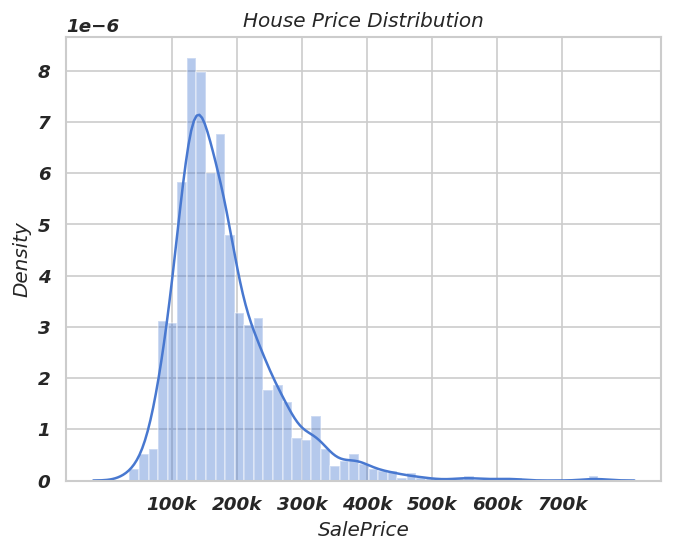

In [122]:
sns.distplot(df['SalePrice']);
plt.title("House Price Distribution")
plt.xticks([100000,200000,300000,400000,500000,600000,700000],['100k','200k','300k','400k','500k','600k','700k'])
plt.show()


<span style='font-family:comic Sans MS; color:navy'>As you can see, the most sold price is in the range of 100k-200k</span>

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 15))
plt.subplots_adjust(left=0.1,    
                    bottom=0.1,
                    right=0.9,
                    top=0.9,)
fig.suptitle('Sale Price with 4 top correlated features')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
# ---------------------------------------------------------
# OverallQual
sns.boxplot(ax=axes[0,0],data = df,x='OverallQual',y='SalePrice',whis=2.5,fliersize=2)
axes[0,0].set_yticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[0,0].set_xlabel('Overall Quality')
axes[0,0].set_ylabel('Price')

# GrLivArea
sns.scatterplot(ax=axes[0,1],x='SalePrice', y='GrLivArea',data=df,hue='SalePrice')
axes[0,1].set_xticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[0,1].set_xlabel('Price')
axes[0,1].set_ylabel('Being high above the ground')


# GarageCars
sns.boxplot(ax=axes[1,0],data = df,x='GarageCars',y='SalePrice',whis=2.5,fliersize=2)
axes[1,0].set_yticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[1,0].set_xlabel('Number of Car')
axes[1,0].set_ylabel('Price')

# GarageArea
sns.scatterplot(ax=axes[1,1],x='SalePrice', y='GarageArea',data=df,hue='SalePrice')
axes[1,1].set_xticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[1,1].set_xlabel('Price')
axes[1,1].set_ylabel('Garage area')

# Set the spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.2)

<span style='font-family:comic Sans MS; color:navy'>As you can see, the Quality of the home is the top correlated feature in our data set which we showed in 10 categories by difrince in price(which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available), in the second graph we showed(linear relationship), if the Ground Area be big it has more price, and third part we can see the relation of GrageCars(How many cars can we put) and price and the last one we see the garage areas and the effect of that on house price. </span>

In [ ]:
# Setting
fig, axes = plt.subplots(2, 2, figsize=(10, 15))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9)
fig.suptitle('Sale Price with 4 top correlated features')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
# ------------------------------------------------------------------------
# YearBuilt
sns.scatterplot(ax=axes[0,0],x='SalePrice', y='YearBuilt',data=df,hue='SalePrice')
axes[0,0].set_xticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Year')
# ------------------------------------------
# FullBath
# FullBath: Full bathrooms above grade
sns.boxplot(ax=axes[0,1],data = df,x='FullBath',y='SalePrice',whis=2.5,fliersize=2)
axes[0,1].set_yticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[0,1].set_xlabel('Number of bathroom')
axes[0,1].set_ylabel('Price')
# -------------------------------------------
# Total square feet of basement area
sns.scatterplot(ax=axes[1,0],x='SalePrice', y='TotalBsmtSF',data=df,hue='SalePrice')
axes[1,0].set_xticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[1,0].set_xlabel('Price')
axes[1,0].set_ylabel('Underground Area')
# --------------------------------------------
# 1stFlrSF
sns.scatterplot(ax=axes[1,1],x='SalePrice', y='1stFlrSF',data=df,hue='SalePrice')
axes[1,1].set_xticklabels(['0','100k','200k','300k','400k','500k','600k','700k'])
axes[1,1].set_xlabel('Price')
axes[1,1].set_ylabel('First Floor Area')

# Set the spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.2)

<span style='font-family:comic Sans MS; color:navy'>As you can see, The year the houses were built has a great impact on the price of the house, as you can see in the picture on the left and above, old houses are cheap and new houses have to be bought at a high price, and it is very clear that house construction has increased in recent years.</span>

<span style='font-family:comic Sans MS; color:navy'> - The number of bathrooms that a house has also affects the price, so it can be said that the houses that have this convenience have a good price.</span>
    
<span style='font-family:comic Sans MS; color:navy'> - And in the third graph, we have shown the relationship between the underground area of a house and its price, which very clearly tells us that a larger area costs more.</span>
    
<span style='font-family:comic Sans MS; color:navy'> - The third and fourth graphs express the same issue, in the fourth graph we have shown that the larger the area of the first floor, the higher the price of the house.
</span>

# <b>6 <span style='color:#94D4F6'>|</span> Featur Engineering</b>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.1 |</span></b> Taking care of missing data </b></p></div>

In [14]:
# cols names which contains missing values
df.columns[df.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<span style='font-family:comic Sans MS; color:navy'>We have Null data in 19 columns</span>

In [125]:
# !pip install autoviz
# !pip install -U --pre pycaret
from sklearn.pipeline import Pipeline
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret  import regression
from scipy import stats
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Id,1460,int64,0,0.000000,100.000000,0,possible ID column: drop
LotArea,1073,int64,0,0.000000,73.493151,0,
GrLivArea,861,int64,0,0.000000,58.972603,0,
BsmtUnfSF,780,int64,0,0.000000,53.424658,0,
1stFlrSF,753,int64,0,0.000000,51.575342,0,
TotalBsmtSF,721,int64,0,0.000000,49.383562,0,
SalePrice,663,int64,0,0.000000,45.410959,0,
BsmtFinSF1,637,int64,0,0.000000,43.630137,0,
GarageArea,441,int64,0,0.000000,30.205479,0,
2ndFlrSF,417,int64,0,0.000000,28.561644,0,


<AxesSubplot:>

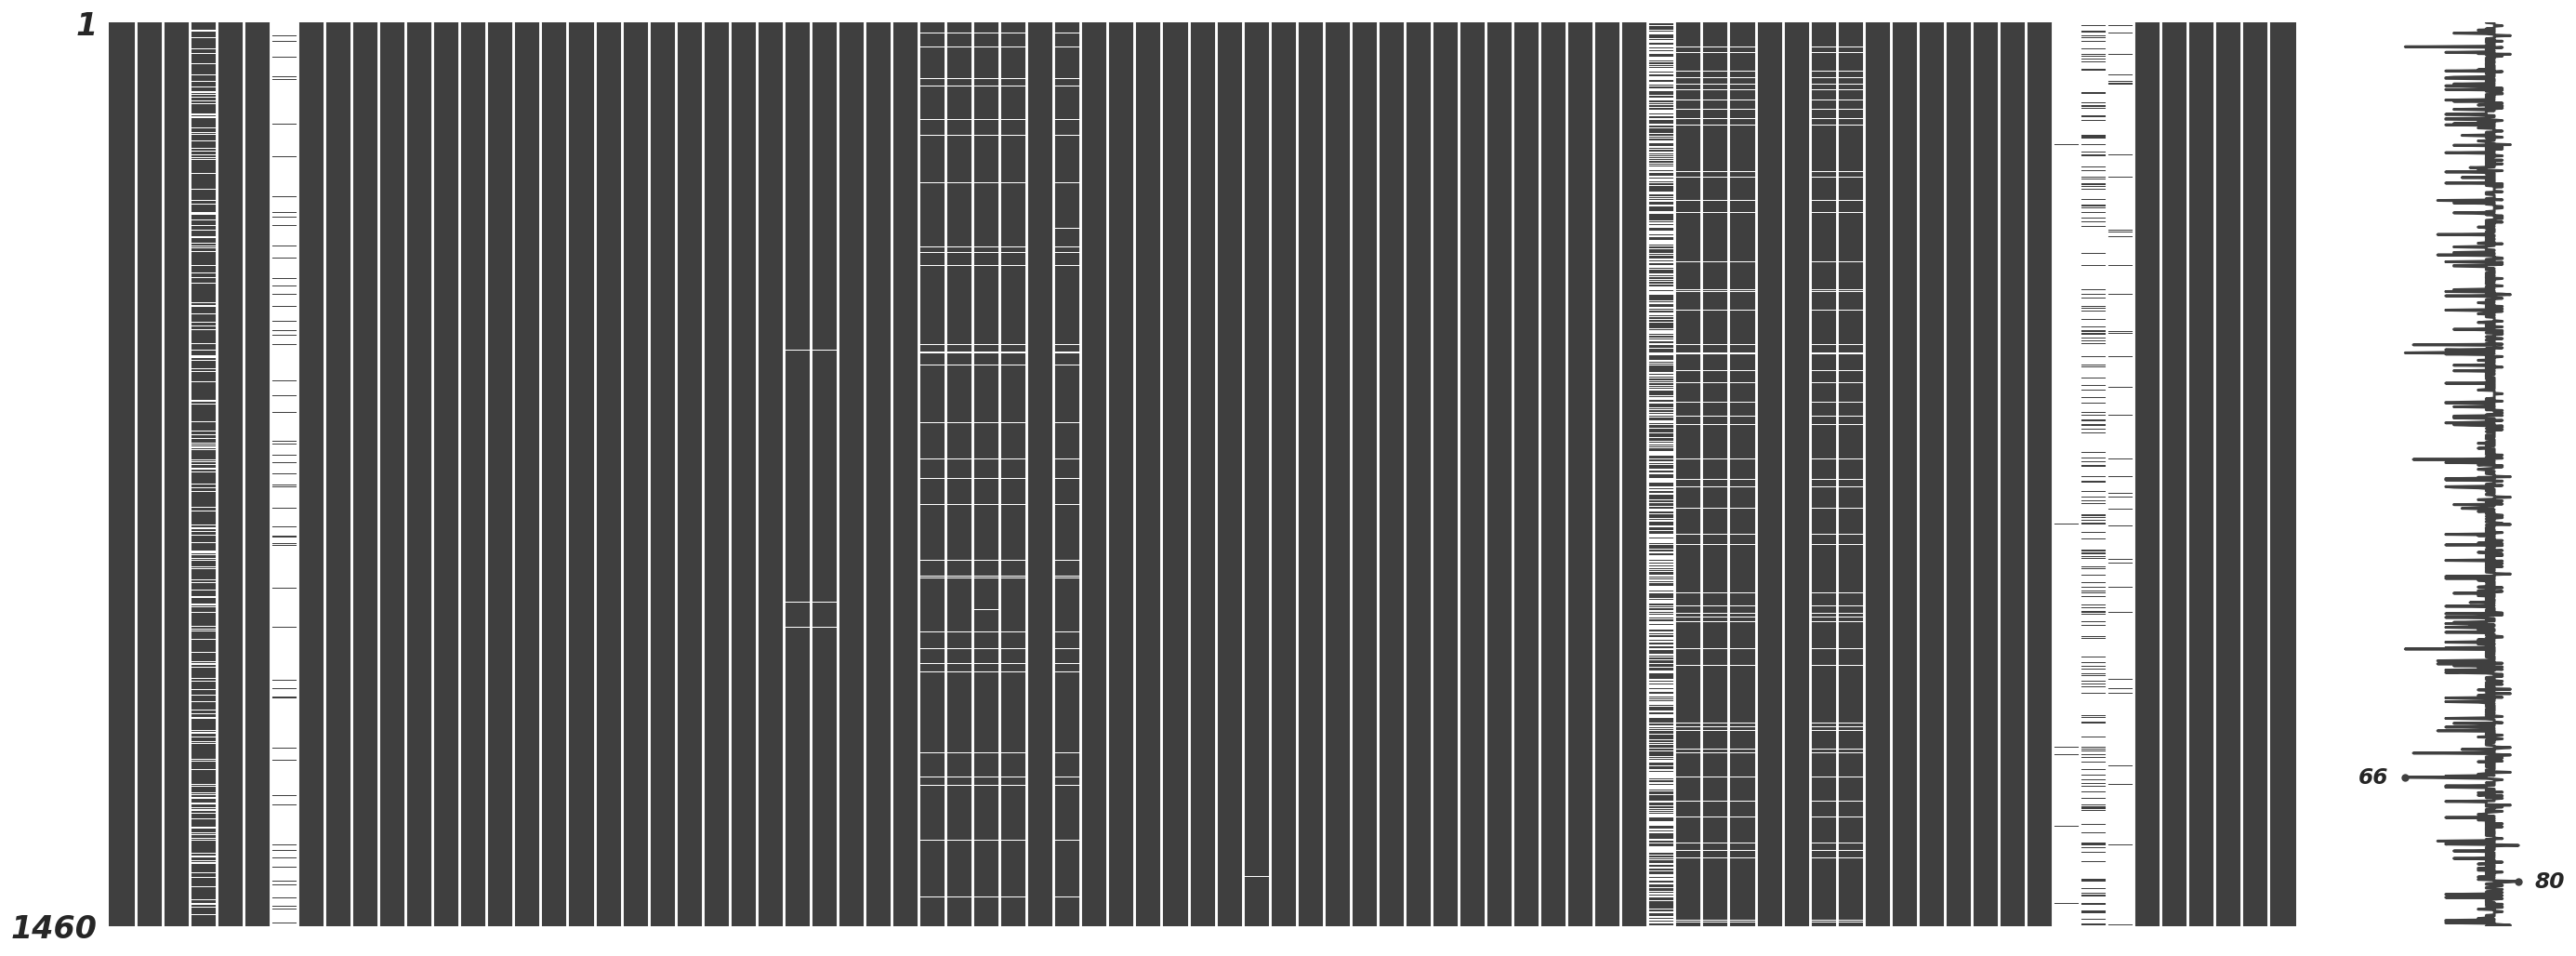

In [126]:
# Show missing Value
msno.matrix(df)

<span style='font-family:comic Sans MS; color:navy'>missing values in each columns will be presented by white lines</span>


In [127]:
# Fill missing value by previous value
df.fillna(method='bfill',inplace=True)
# Or we can fill missing value by next value
df.fillna(method='ffill',inplace = True)\

<span style='font-family:comic Sans MS; color:navy'>We have two Option for fill the missing value one fill by befor value other fill by next value</span>

<AxesSubplot:>

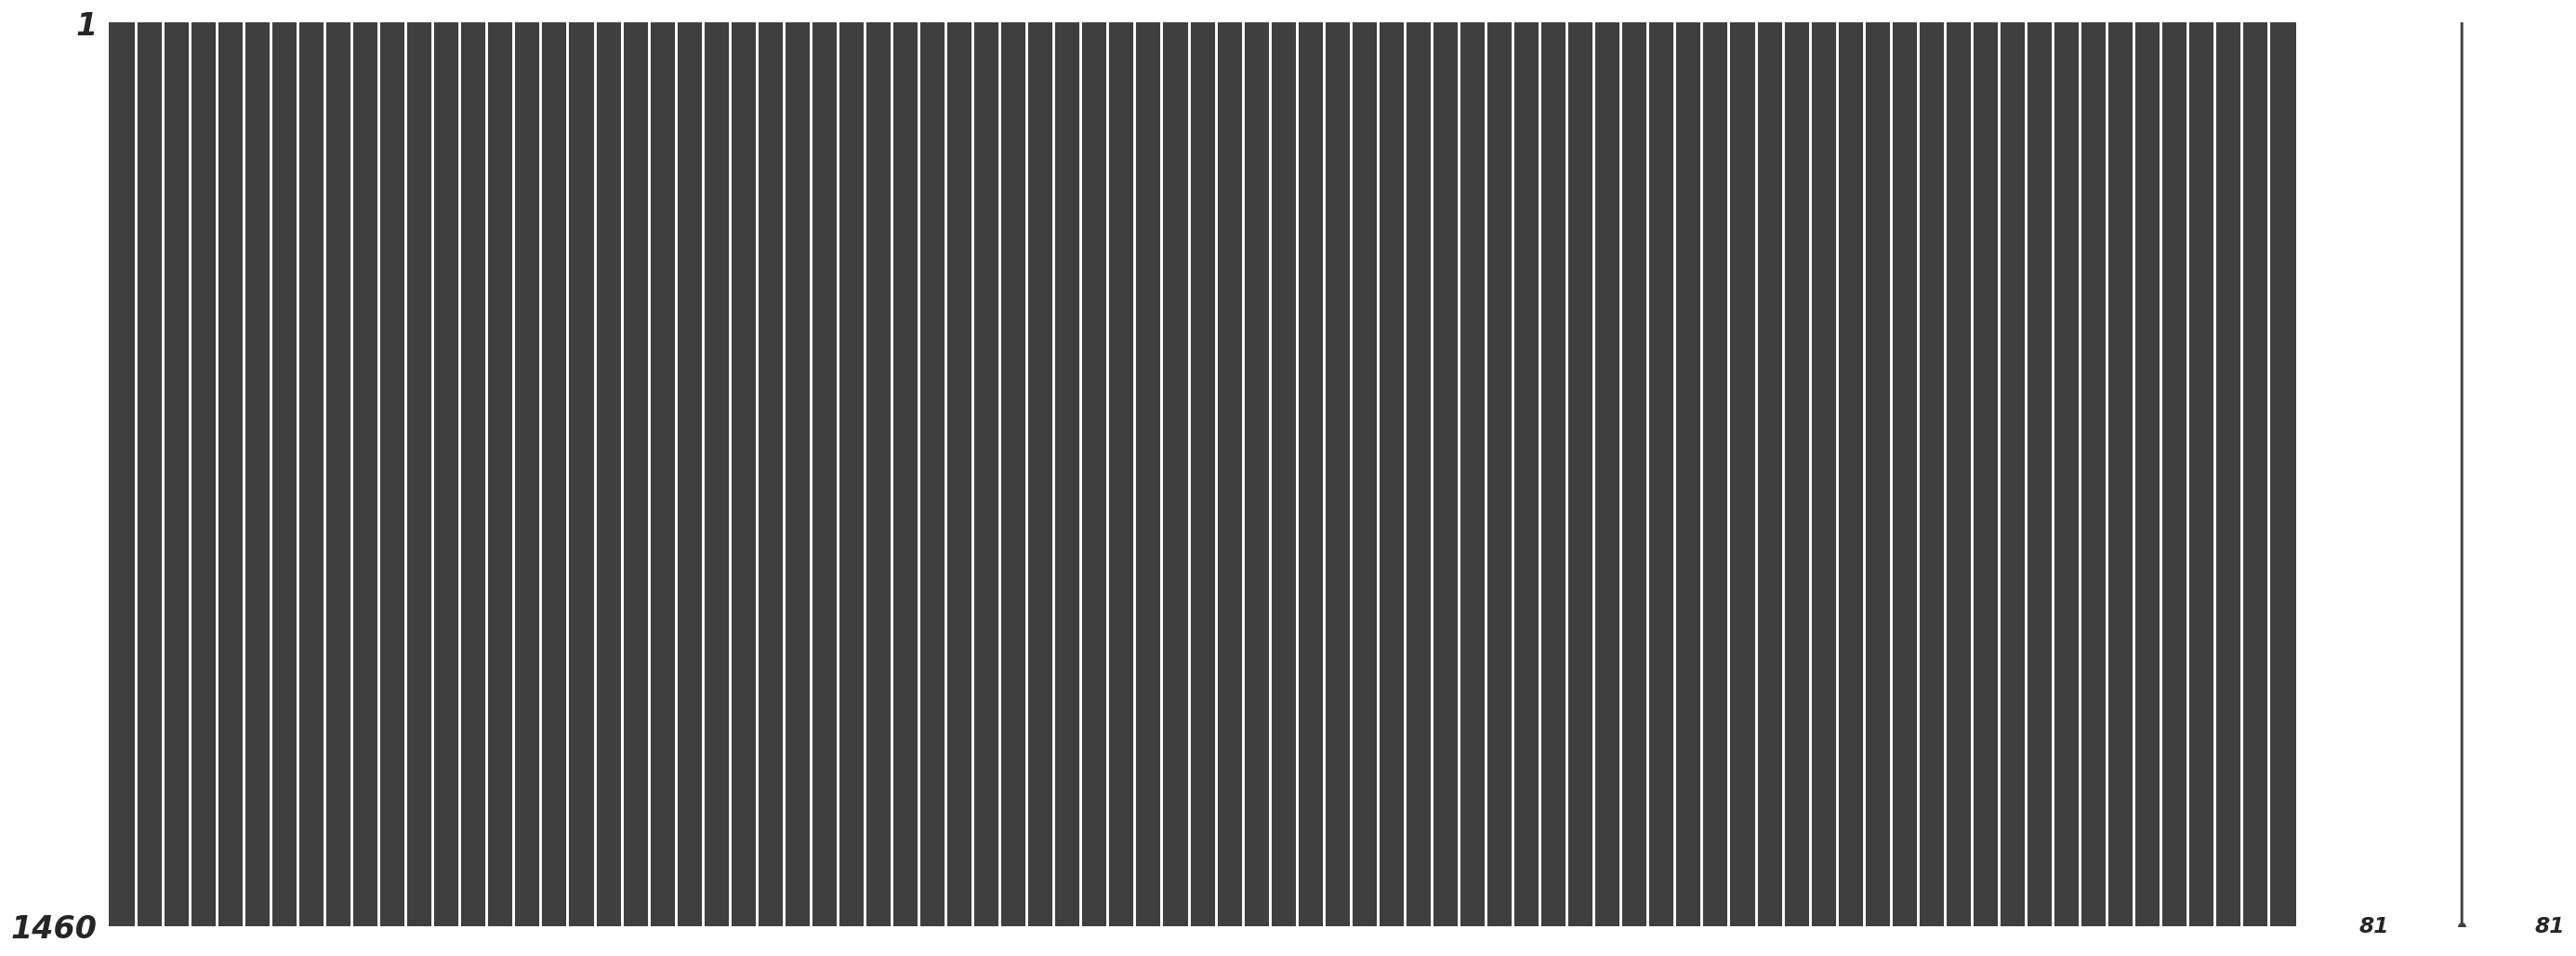

In [128]:
msno.matrix(df)

<span style='font-family:comic Sans MS; color:navy'>As you can see, we don't have any missing value now in our dataSet</span>

In [129]:
## cols names which contains missing values
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

<span style='font-family:comic Sans MS; color:navy'>As you can see,by this commend we don't have Null data</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.2 |</span></b> Drop duplicate data </b></p></div>

In [130]:
## shows number of duplicated values in the dataset
print('Number of duplicated values in dataset: ', df.duplicated().sum())

Number of duplicated values in dataset:  0


<span style='font-family:comic Sans MS; color:navy'>As you can see,we don't have duplicate data in our dataSet</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.3 |</span></b> Drop outliers in the data </b></p></div>

In [131]:
numeric_columns = [x for i,x in enumerate(df.select_dtypes(include=np.number).columns.tolist())
                   if(x!='SalePrice')] 
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [132]:
def IQR_method (df,n,features):
    outlier_list = []
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n)
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0]) 
    return multiple_outliers

In [133]:
## drop outliers using IQR_method
Outliers_IQR = IQR_method(df,1,numeric_columns)
# print(Outliers_IQR)
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.4 |</span></b> Feature selection </b></p></div>


In [ ]:
# correlation matrix between numerical cols in the dataset.
fig, ax = plt.subplots(figsize=(38,38))
coer = df.corr()
sns.heatmap(coer, annot = True, ax=ax, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

<span style='font-family:comic Sans MS; color:navy'>As you can see, we have some unnecessary columns which we didn't need for Price Prediction or maybe have a weak correlation.</span>

In [136]:
df.corr()['SalePrice'].sort_values(ascending=False)[0:20] 

SalePrice      1.00
OverallQual    0.82
GrLivArea      0.76
GarageCars     0.68
GarageArea     0.65
YearBuilt      0.63
FullBath       0.63
TotalBsmtSF    0.62
1stFlrSF       0.60
TotRmsAbvGrd   0.59
YearRemodAdd   0.57
GarageYrBlt    0.55
MasVnrArea     0.48
Fireplaces     0.45
OpenPorchSF    0.37
WoodDeckSF     0.36
BsmtFinSF1     0.36
2ndFlrSF       0.33
LotFrontage    0.30
HalfBath       0.30
Name: SalePrice, dtype: float64

In [137]:
col_drops = ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold'] ## cols to drop 
df.drop(col_drops,axis=1,inplace=True)

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.5 |</span></b> Label encoding of categorical data </b></p></div>


In [138]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(df.columns).difference(set(numeric_cols))   
print(categorical_cols)

{'ExterQual', 'BldgType', 'GarageType', 'PavedDrive', 'BsmtExposure', 'Utilities', 'SaleType', 'MasVnrType', 'GarageFinish', 'Exterior2nd', 'LandSlope', 'CentralAir', 'LandContour', 'Condition1', 'Foundation', 'FireplaceQu', 'Alley', 'Condition2', 'Neighborhood', 'Heating', 'GarageQual', 'HeatingQC', 'Exterior1st', 'HouseStyle', 'BsmtCond', 'MSZoning', 'BsmtQual', 'PoolQC', 'Fence', 'Functional', 'MiscFeature', 'GarageCond', 'ExterCond', 'Electrical', 'LotShape', 'RoofStyle', 'KitchenQual', 'SaleCondition', 'RoofMatl', 'LotConfig', 'BsmtFinType2', 'Street', 'BsmtFinType1'}


<span style='font-family:comic Sans MS; color:navy'>As you can see, here we have some categorical columns now we want to change them to predict.</span>

In [140]:
## print all unique values in categorical columns
for i, x in enumerate(categorical_cols):  
    print(x, df[x].unique())

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
BldgType ['1Fam' 'TwnhsE' 'Duplex' 'Twnhs' '2fmCon']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']
PavedDrive ['Y' 'N' 'P']
BsmtExposure ['No' 'Mn' 'Av' 'Gd']
Utilities ['AllPub']
SaleType ['WD' 'New' 'COD' 'ConLI' 'ConLw' 'Con' 'ConLD' 'CWD' 'Oth']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
GarageFinish ['RFn' 'Unf' 'Fin']
Exterior2nd ['VinylSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd' 'MetalSd'
 'BrkFace' 'Stucco' 'AsbShng' 'ImStucc' 'Brk Cmn' 'AsphShn' 'Other'
 'Stone']
LandSlope ['Gtl' 'Mod' 'Sev']
CentralAir ['Y' 'N']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Condition1 ['Norm' 'RRAe' 'Feedr' 'RRNn' 'RRAn' 'Artery' 'PosN' 'RRNe' 'PosA']
Foundation ['PConc' 'BrkTil' 'CBlock' 'Slab' 'Stone' 'Wood']
FireplaceQu ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Alley ['Grvl' 'Pave']
Condition2 ['Norm' 'RRNn' 'Feedr' 'RRAn']
Neighborhood ['CollgCr' 'Crawfor' 'NoRidge' 'Somerst' 'Sawyer' 'NridgHt' 'BrkSide'
 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 

<span style='font-family:comic Sans MS; color:navy'>Below we have some columns with their Unique data which come to dataSet ones</span>

In [141]:
## drop this col since it has one value
df.drop(['Utilities'],axis=1,inplace=True)

<span style='font-family:comic Sans MS; color:navy'>here we delete the data come ones</span>

In [142]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(df.columns).difference(set(numeric_cols)) 

In [143]:
## names of columns that will label encoded
lecols = []  
for x in categorical_cols:
    lecols.append(x)
le = LabelEncoder() #imported
df[lecols] = df[lecols].apply(le.fit_transform) #fit data
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,3,65.00,8450,1,0,3,3,4,0,3,...,0,61,0,0,2,2,2,8,4,208500
1,3,68.00,11250,1,0,0,3,4,0,3,...,0,42,0,0,2,2,9,8,4,223500
2,3,60.00,9550,1,0,0,3,0,0,4,...,0,35,272,0,2,2,2,8,0,140000
3,3,84.00,14260,1,0,0,3,2,0,13,...,192,84,0,0,2,2,12,8,4,250000
4,3,75.00,10084,1,0,3,3,4,0,19,...,255,57,0,0,1,2,8,8,4,307000


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.6 |</span></b> Feature Scaling </b></p></div>


In [144]:
# scalar for all numerical columns excluding target column
sc_X = StandardScaler()
# scalar for the target column
sc_y = StandardScaler()
# list of col  names that include numerical values
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# list of all numeric cols excluding the target col
numeric_cols_x = [x for i,x in enumerate(numeric_cols) if(x!='SalePrice')]
# list includes target col name
numeric_cols_y = [x for i,x in enumerate(numeric_cols) if(x not in numeric_cols_x)]
df[numeric_cols_x] = sc_X.fit_transform(df[numeric_cols_x])
df[numeric_cols_y]= sc_y.fit_transform(df[numeric_cols_y])
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,0.00,-0.28,-0.25,0.05,-0.93,0.77,0.30,0.60,-0.21,-1.19,...,-0.81,0.36,-0.30,-1.84,0.61,0.11,-1.58,0.31,0.19,0.46
1,0.00,-0.12,0.29,0.05,-0.93,-1.33,0.30,0.60,-0.21,-1.19,...,-0.81,-0.00,-0.30,-1.84,0.61,0.11,0.99,0.31,0.19,0.68
2,0.00,-0.56,-0.04,0.05,-0.93,-1.33,0.30,-1.90,-0.21,-1.03,...,-0.81,-0.14,5.25,-1.84,0.61,0.11,-1.58,0.31,-3.54,-0.58
3,0.00,0.76,0.87,0.05,-0.93,-1.33,0.30,-0.65,-0.21,0.48,...,0.93,0.81,-0.30,-1.84,0.61,0.11,2.09,0.31,0.19,1.08
4,0.00,0.26,0.07,0.05,-0.93,0.77,0.30,0.60,-0.21,1.48,...,1.50,0.29,-0.30,-1.84,-0.58,0.11,0.62,0.31,0.19,1.95


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.7 |</span></b> Define the independent and dependent variables </b></p></div>

In [145]:
X = df.iloc[:, :-1].values ## independent variables
y = df.iloc[:, -1].values  ## dependent variables

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>6.8 |</span></b> Splitting the dataset into training and testing </b></p></div>

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


<span style='font-family:comic Sans MS; color:navy'>splitting the dataset into 80% training and 20% testing</span>

# <b>7 <span style='color:#94D4F6'>|</span>The machine learning models</b>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>7.1 |</span></b> Initial models test </b></p></div>

In [147]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)

,model name,R2 score
0,support vector linear,0.89
1,support vector kernel,0.85
2,XGBOOST,0.88
3,Decision Tree,0.78
4,Random Forest,0.88
5,LGBM,0.90


- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7">  plot cross validation R2 scores for the models   </mark>**

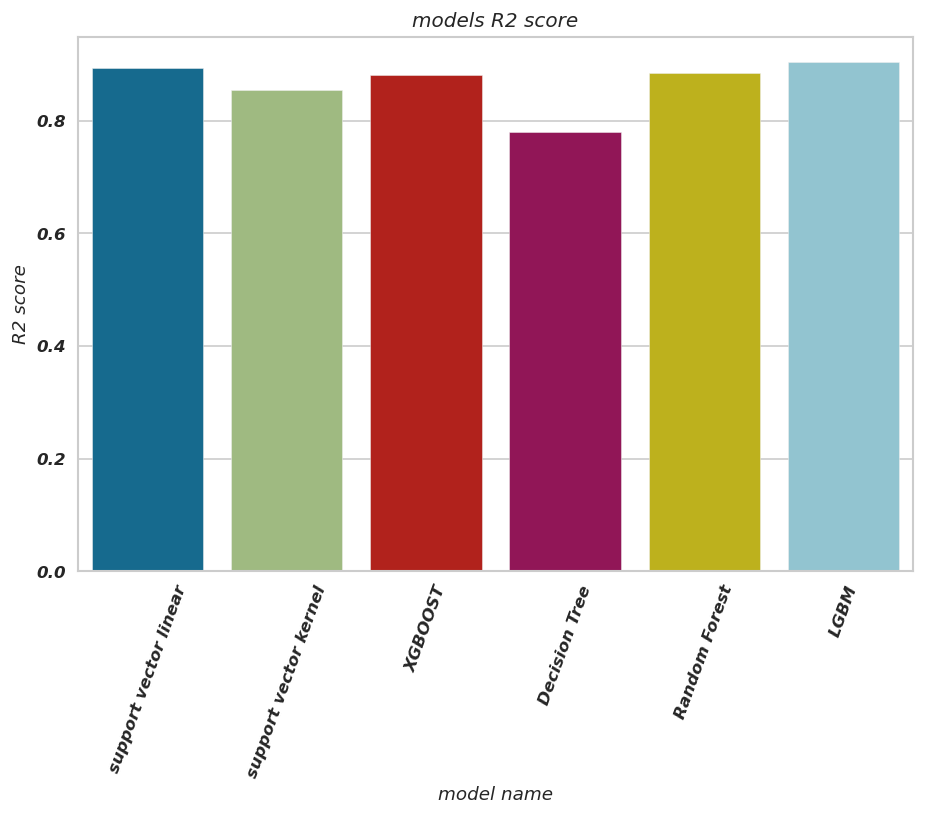

In [148]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()


<span style='font-family:comic Sans MS; color:navy'>As you can see, the LGBM model is the best and we use it for our final prediction and submission.</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>7.2 |</span></b> Tuning the parameters of promising models </b></p></div>

<span style='font-family:comic Sans MS; color:navy'>In the below, we have some model which was better for prediction,  we should try to make them better and choose one of them.</span>

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7">Random Forest </mark>**

In [149]:
import pickle # to store the result and prevent a run every round.
rf = RandomForestRegressor(random_state=0,n_estimators=10)
param_grid = {
    'max_features':['auto','sqrt'],
    'max_depth':[int(x) for x in np.linspace(5,30,6)],
    'min_samples_split':[2,5,10,15,100],
    'min_samples_leaf':[1,2,5,10],
}
rf_cv = RandomizedSearchCV(rf,param_grid,n_iter = 40,refit = 'recall',
                           scoring = 'neg_mean_squared_error',cv=5,verbose=0,random_state=42,n_jobs=-1)
rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error')

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7"> XGBOOST </mark>**

In [150]:
xgb = XGBRegressor()
param_grid = {
    'learning_rate':[0.0001,0.001,0.01,0.1,1],
    'max_depth':range(3,21,3),
    'gamma':[i/10.0 for i in range(0,5)],
    'colsample_bytree':[i/10.0 for i in range(3,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 100],
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 10, 100]
}
xgb_cv = RandomizedSearchCV(xgb,param_grid,n_iter=100, refit='recall',
                           scoring = 'neg_mean_squared_error',verbose=0,random_state=42,n_jobs=-1)
xgb_cv.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=-1,
   

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7"> LGBM</mark>**

In [152]:
lgbm = LGBMRegressor()
param_grid = {
    'learning_rate' : [0.0001,0.001,0.01,0.1,1],
    'max_depth':range(3,21,3),
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
    
}
lgbm_cv = RandomizedSearchCV(lgbm, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=0, random_state=42, n_jobs = -1)
lgbm_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error')

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>7.3 |</span></b> Accuracy of models after tuning </b></p></div>


- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7"> A table that shows the cross validation R2 score and RMSE after tuning</mark>**

In [153]:
print(' Cross validation scores of the models after tuning \n')
table = [["Model name","R2 score",'RMSE'],
        ['XGBOOST',1+xgb_cv.best_score_, -xgb_cv.best_score_],
        ['Random forest',1+rf_cv.best_score_, -rf_cv.best_score_],
        ['LGBM',1+lgbm_cv.best_score_, -lgbm_cv.best_score_],]
tab =PrettyTable(table[0])
tab.add_row(table[1])
tab.add_row(table[2])
tab.add_row(table[3])
tab.hrules = ALL
tab.vrules = ALL
print(tab)

 Cross validation scores of the models after tuning 

+---------------+--------------------+---------------------+
|   Model name  |      R2 score      |         RMSE        |
+---------------+--------------------+---------------------+
|    XGBOOST    | 0.902185423360254  | 0.09781457663974605 |
+---------------+--------------------+---------------------+
| Random forest | 0.875432054923922  | 0.12456794507607807 |
+---------------+--------------------+---------------------+
|      LGBM     | 0.9079622635198369 | 0.09203773648016308 |
+---------------+--------------------+---------------------+


<span style='font-family:comic Sans MS; color:navy'>As you can see, all of the model accuracies improved and once again the LGBM model is the best and we use it for our final prediction and competition submission.</span>


<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>4.4 |</span></b> Define the final regression model </b></p></div>

In [154]:
regressor = LGBMRegressor(**lgbm_cv.best_params_)

<span style='font-family:comic Sans MS; color:navy'>Here we define the best model using optimized parameters based step 7.3</span>

# <b>8 <span style='color:#94D4F6'>|</span>Training and Testing the regression Model</b>

In [155]:
regressor.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.5, max_depth=12, reg_alpha=0.01, reg_lambda=10)

<span style='font-family:comic Sans MS; color:navy'>Here we train the final regression model</span>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>8.1 |</span></b> Testing the regression model </b></p></div>

In [159]:
# prediciting the value of y for the test set X_test
y_pred = regressor.predict(X_test)
# printing the predicted values and test values side by side

## we control which print only two decimal points
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1.12e+00 -1.50e+00]
 [-3.09e-01 -5.05e-01]
 [-4.83e-01 -6.28e-01]
 [ 1.35e+00  1.07e+00]
 [ 6.86e-01  4.79e-01]
 [ 5.54e-01  6.83e-01]
 [-6.80e-01 -5.96e-01]
 [ 2.13e+00  1.54e+00]
 [ 6.44e-01  1.76e-01]
 [-5.70e-01 -3.40e-01]
 [-1.27e+00 -1.33e+00]
 [-5.40e-02 -8.16e-02]
 [-4.44e-02 -2.48e-01]
 [ 4.99e-02 -3.09e-01]
 [-4.78e-01 -5.81e-01]
 [ 6.50e-01  5.54e-01]
 [-5.76e-01 -7.70e-01]
 [ 1.48e+00  1.31e+00]
 [-2.90e-01 -5.81e-01]
 [-8.65e-01 -1.07e+00]
 [-7.69e-01 -7.63e-01]
 [-9.03e-01 -9.60e-01]
 [-7.49e-01 -7.10e-01]
 [-4.13e-01 -5.66e-01]
 [ 4.75e-02 -5.90e-03]
 [ 5.91e-03 -5.90e-03]
 [ 2.77e+00  3.75e+00]
 [-7.13e-01 -5.90e-01]
 [-7.91e-01 -5.36e-01]
 [ 1.34e+00  1.08e+00]
 [-3.57e-01 -2.78e-01]
 [-1.01e+00 -5.96e-01]
 [-6.52e-01 -1.35e+00]
 [-4.26e-01 -2.56e-01]
 [-5.82e-01 -6.72e-01]
 [-2.58e-01 -8.92e-02]
 [-6.19e-01 -5.78e-01]
 [-8.54e-01 -8.76e-01]
 [ 2.63e-01  1.38e-01]
 [-1.13e+00 -1.45e+00]
 [-7.81e-01 -1.03e+00]
 [ 4.87e-01  3.65e-01]
 [-1.22e-01 -2.78e-01]
 [-7.55e-01

# <b>9 <span style='color:#94D4F6'>|</span> Deal with Test Data</b>

In [157]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [85]:
df_test.shape

(1459, 80)

<span style='font-family:comic Sans MS; color:navy'>As you can see, we have 80 columns including columns which not necessary for our prediction and columns with missing data and categorical data.</span>

In [86]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<span style='font-family:comic Sans MS; color:navy'>As you can see, we have the 80 columns name here and we should do some preProcessing operations on our data</span>

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7">Dealing with missing data in the test dataset</mark>**

In [87]:
df_test.columns[df_test.isnull().sum() > 0]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [88]:
# fill missing values by previous value
df_test.fillna(method='bfill',inplace=True)
# fill missing values by next value
df_test.fillna(method='ffill',inplace=True)

<span style='font-family:comic Sans MS; color:navy'>here we fill the missing Data with previous data and the next value</span>

- **<mark style="background-color:#D1D96A;color:black;border-radius:5px;opacity:0.7">Let's transform the dataset similar to the training set</mark>**

In [89]:
Id = df_test['Id'].values

<span style='font-family:comic Sans MS; color:navy'>We just need Id Columns for the submission file</span>

In [90]:
# Columns we should drop
new_col_drops = ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold', 'Utilities']
df_test.drop(new_col_drops,inplace=True,axis=1)

<span style='font-family:comic Sans MS; color:navy'>We drop some columns, the same as the data set we train </span>

In [91]:
new_numeric_col = df_test.select_dtypes(include = np.number).columns.tolist()
new_catagorical_cols= set(df_test.columns).difference(set(new_numeric_col))
# names of columns that will label encoded
new_lecols = []
for x in new_catagorical_cols:
    new_lecols.append(x)
df_test[new_lecols] = df_test[new_lecols].apply(le.fit_transform)

In [92]:
#list of col  names that include numerical values
new_numeric_cols = df_test.select_dtypes(include=np.number).columns.tolist()  
df_test[new_numeric_cols] = sc_X.transform(df_test[new_numeric_cols])

In [93]:
X_new = df_test.iloc[:,:].values
y_new = sc_y.inverse_transform([regressor.predict(X_new)])
y_new_formatted = [ '%.0f' % elem for elem in y_new[0] ]


In [94]:
data = {'Id': Id, 'SalePrice': y_new_formatted }
df_sub = pd.DataFrame(data)
df_sub.head()

,Id,SalePrice
0,1461,131532
1,1462,163244
2,1463,176776
3,1464,185925
4,1465,185703


<span style='font-family:comic Sans MS; color:navy'>Here we were preparing a data frame for the submitted file.</span>

In [95]:
df_sub.to_csv('Submission.csv', index=False)

<span style='font-family:comic Sans MS; color:navy'>Done!</span>

<center>
<span style="font-family:Comic Sans MS; color:red"><h2>Thank You😊</h2></span>
</center>